In [45]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path
from itertools import product

In [ ]:
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-11-21__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "l", "lmbda"],
          descending=[False, False, False]
        )
)

print(df_sorted)

shape: (20, 78)
┌───────────┬─────────────┬─────┬─────┬───┬──────────────┬─────────────┬─────────────┬─────────────┐
│ formalism ┆ landscape   ┆ s   ┆ l   ┆ … ┆ tau_forwards ┆ tau_reverse ┆ rtot_capt_f ┆ rtot_rest_f │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---          ┆ s           ┆ it          ┆ it          │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ f64          ┆ ---         ┆ ---         ┆ ---         │
│           ┆             ┆     ┆     ┆   ┆              ┆ f64         ┆ f64         ┆ f64         │
╞═══════════╪═════════════╪═════╪═════╪═══╪══════════════╪═════════════╪═════════════╪═════════════╡
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 3.093816     ┆ 3.147537    ┆ 0.499419    ┆ 0.499256    │
│ 2         ┆ homogeneous ┆ 0   ┆ 10  ┆ … ┆ null         ┆ null        ┆ 0.664401    ┆ 0.659156    │
│ 2         ┆ homogeneous ┆ 0   ┆ 10  ┆ … ┆ 3.553211     ┆ 3.298615    ┆ 0.495264    ┆ 0.495329    │
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 2.981119     ┆ 3.728821    ┆ 0.

In [47]:
# chromatin
Lmin        = df_sorted["Lmin"][0]
Lmax        = df_sorted["Lmax"][0]
bps         = df_sorted["bps"][0]
L = np.arange(Lmin, Lmax, bps)

# time
tmax        = df_sorted["tmax"][0]
dt          = df_sorted["dt"][0]
t = np.arange(0, tmax, dt)

# probas
mu          = df_sorted["mu"][0]
theta       = df_sorted["theta"][0]
rtot_capt   = df_sorted["rtot_capt"][0]
rtot_rest   = df_sorted["rtot_rest"][0]

# values
s = np.unique(df_sorted["s"])
l = np.unique(df_sorted["l"])
lmbda = np.unique(df_sorted["lmbda"])

[45.]


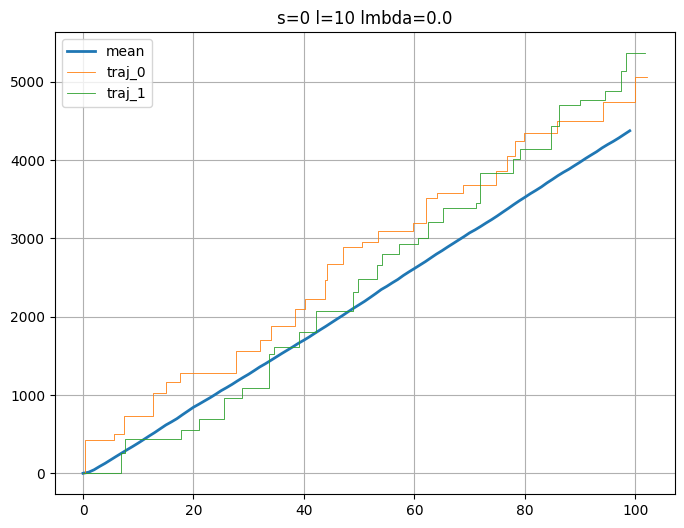

[33.75]


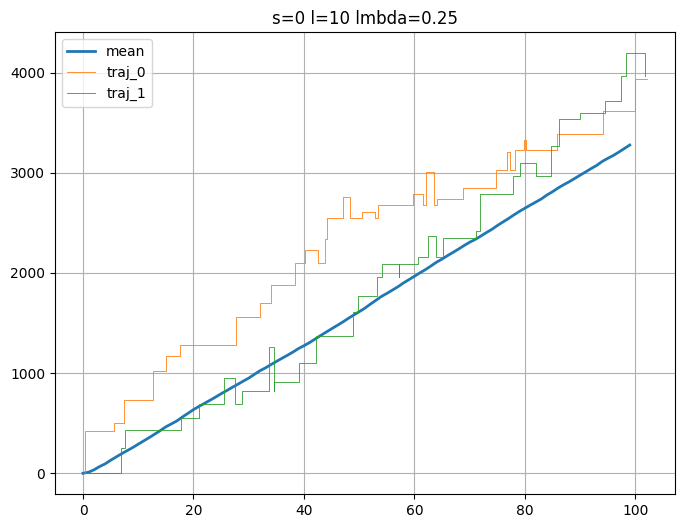

[22.5]


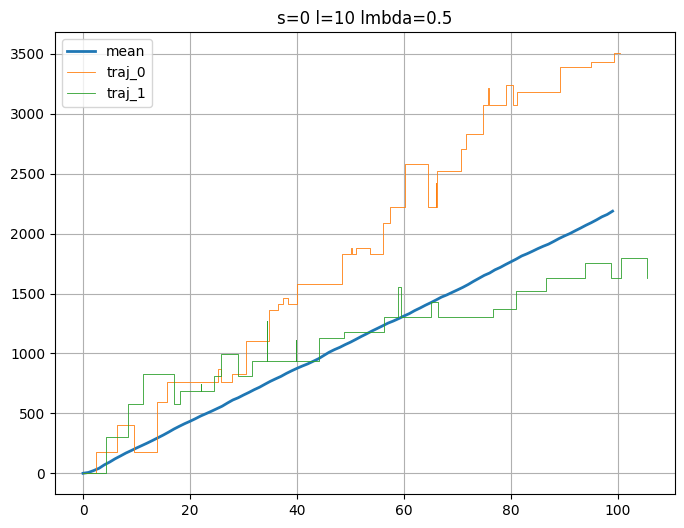

[11.25]


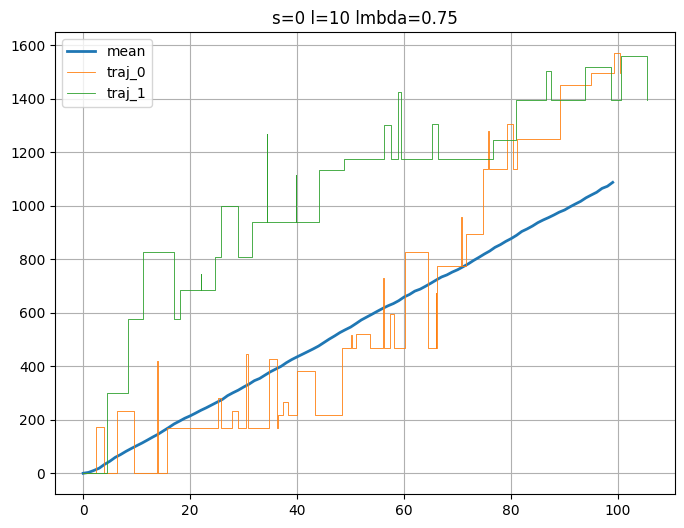

[0.]


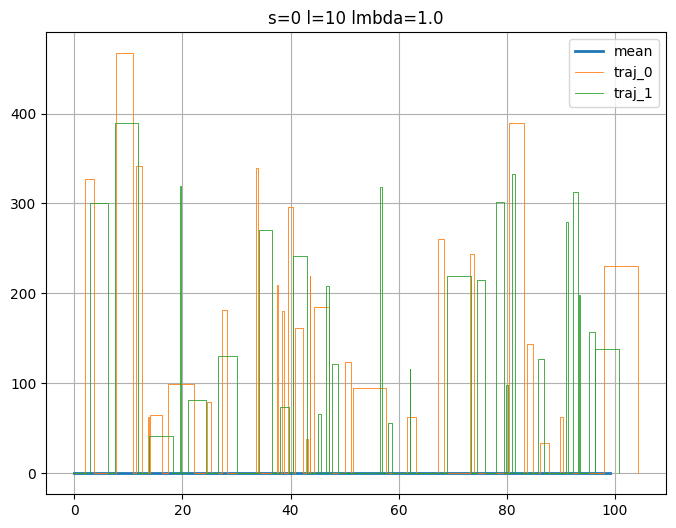

[45.]


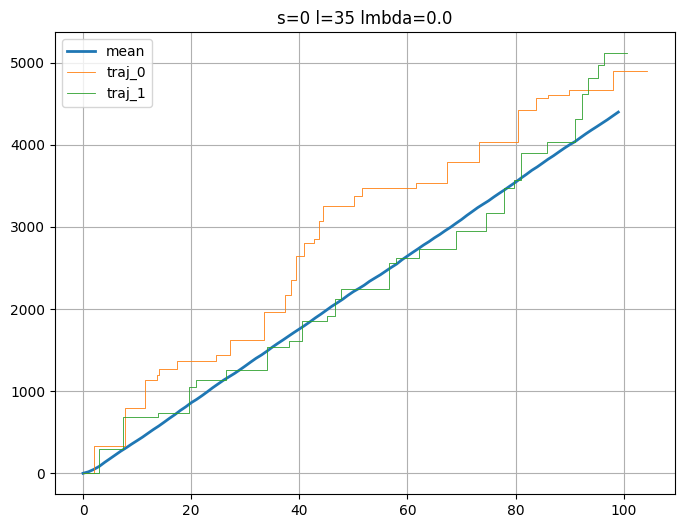

[33.75]


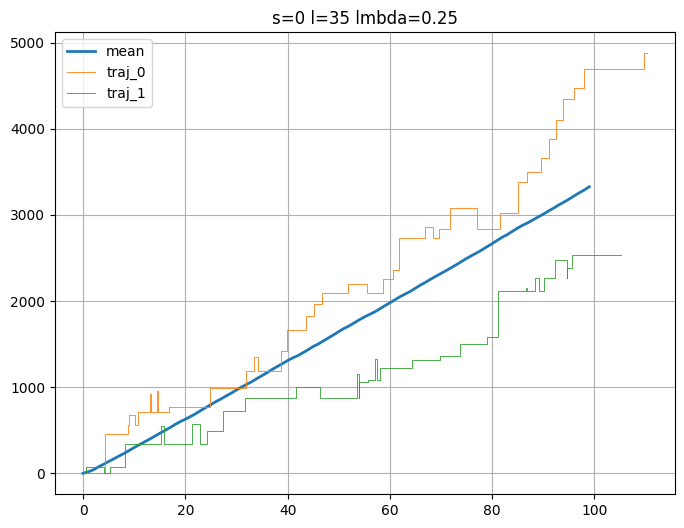

[22.5]


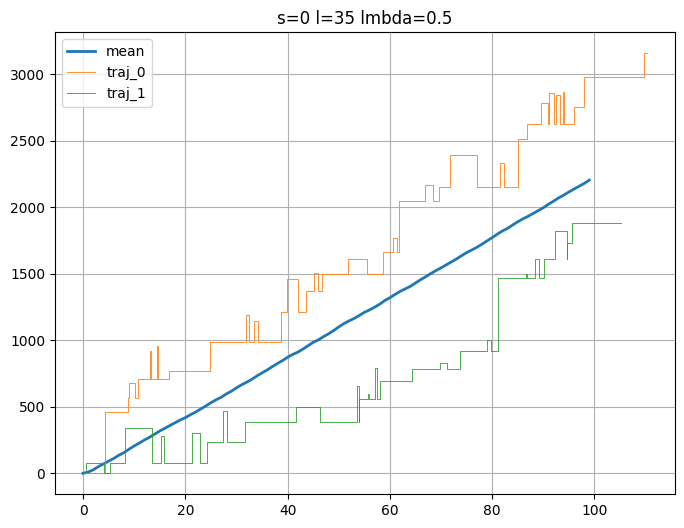

[11.25]


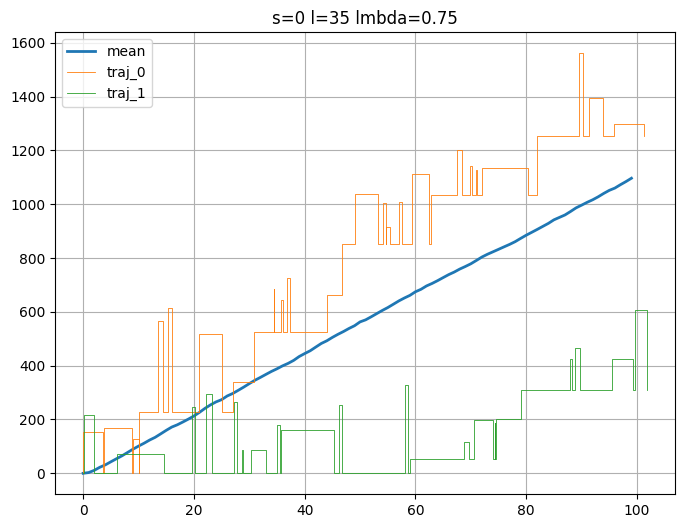

[0.]


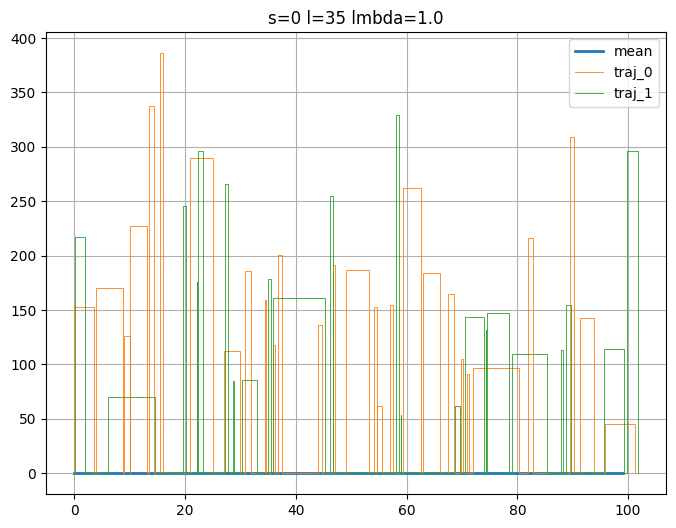

[10.]


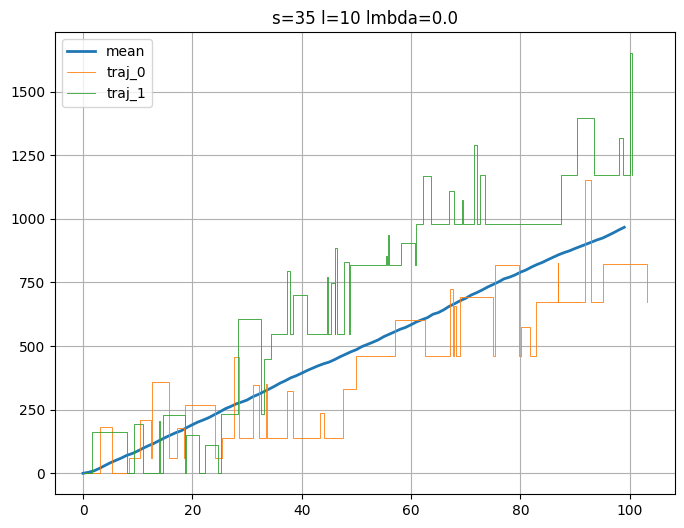

[7.5]


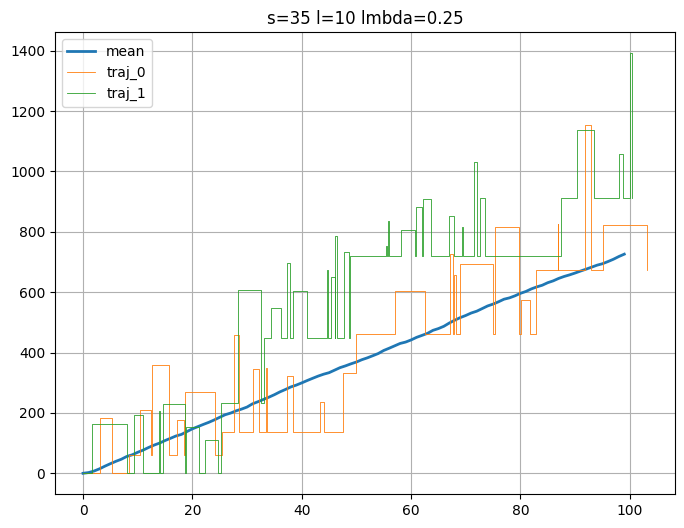

[5.]


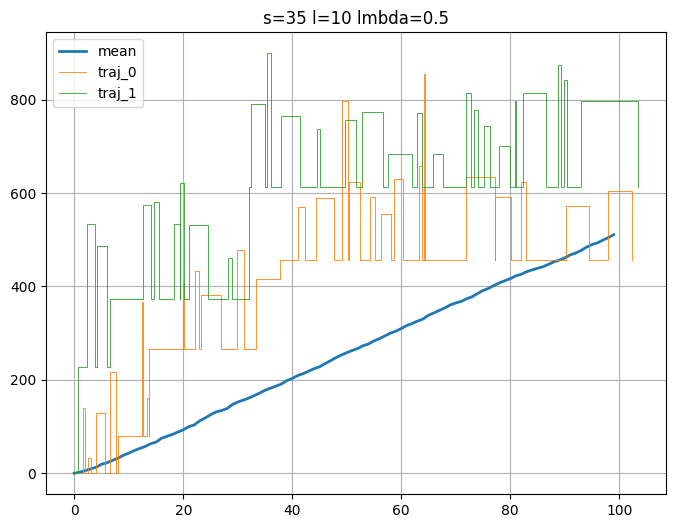

[2.5]


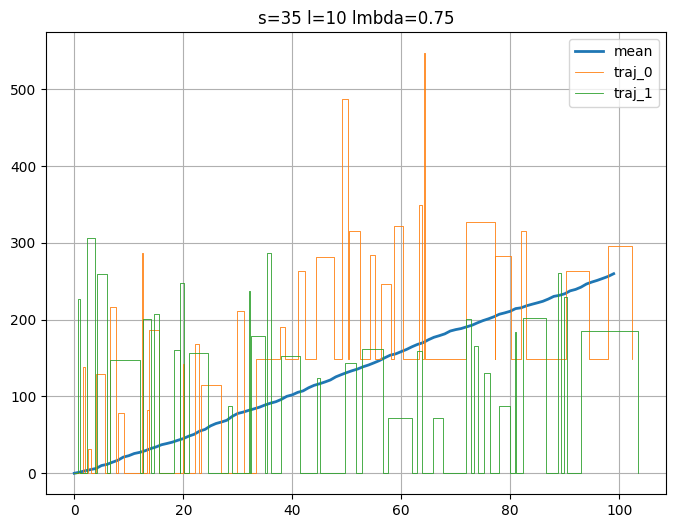

[0.]


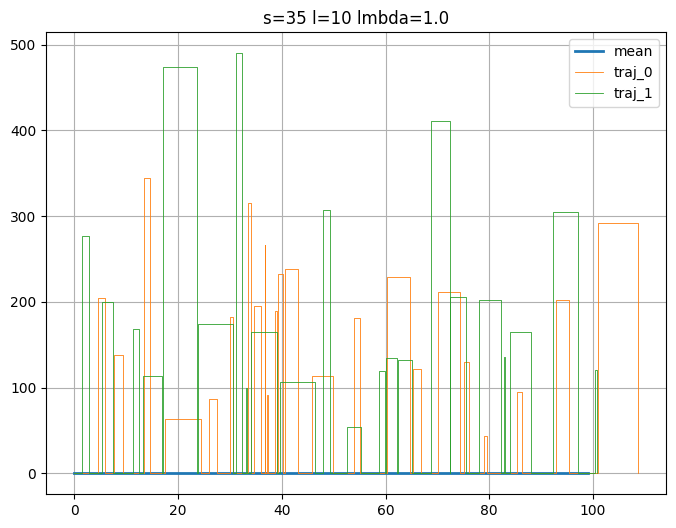

[22.5]


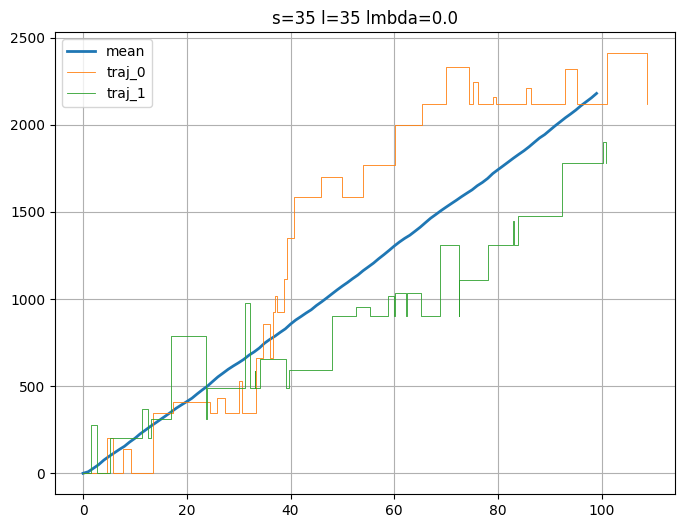

[16.875]


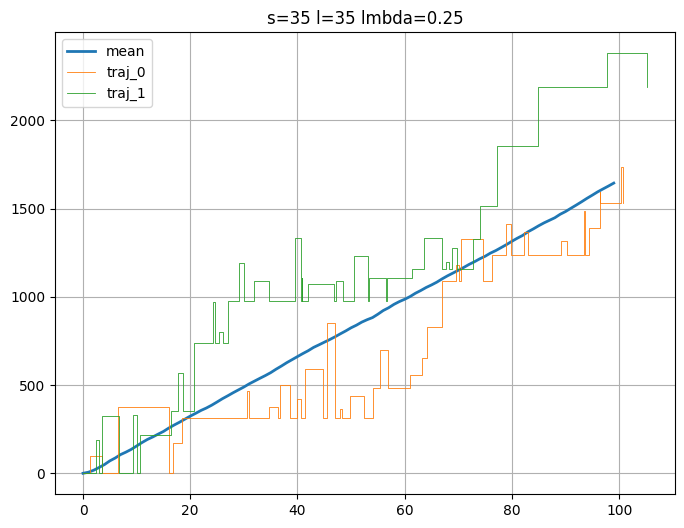

[11.25]


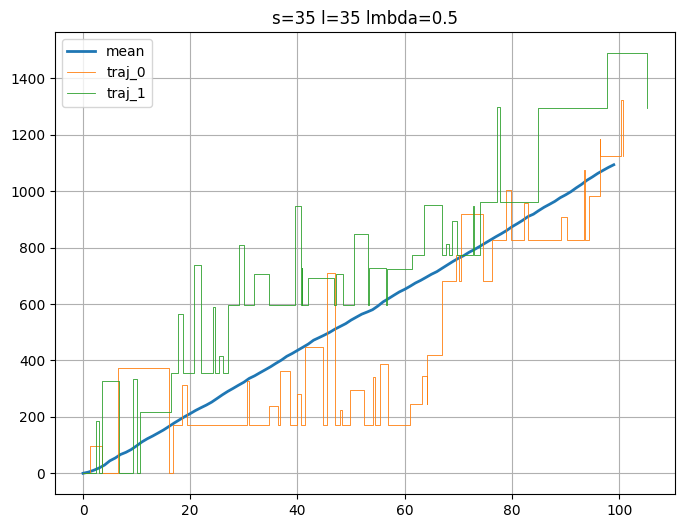

[5.625]


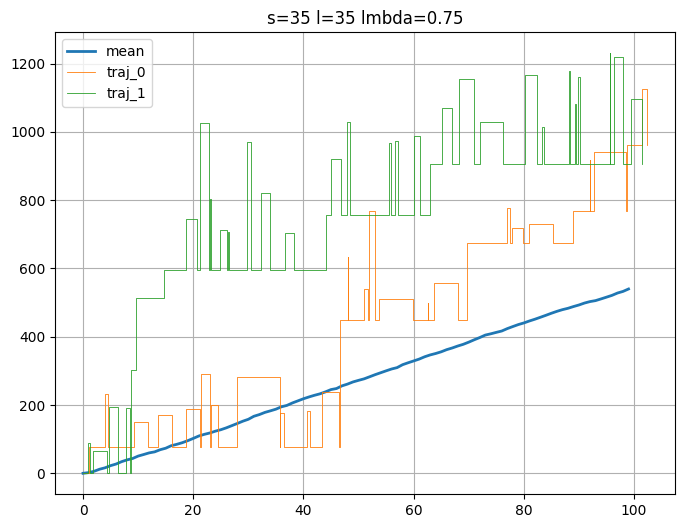

[0.]


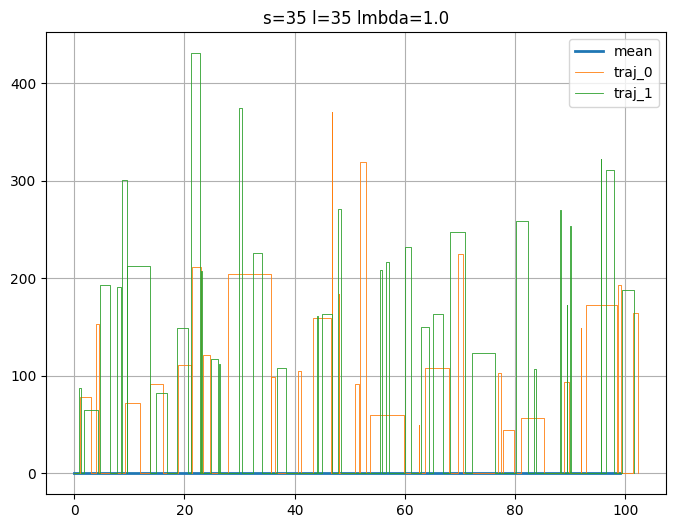

In [48]:
def get_data(df: pl.DataFrame, s: int, l: int, lmbda: float) -> pl.DataFrame:
    return df.filter(
        (pl.col("s") == s) &
        (pl.col("l") == l) &
        (pl.col("lmbda") == lmbda)
    )


for s_val, l_val, lmbda_val in product(s, l, lmbda):
    df = get_data(df=df_sorted, s=s_val, l=l_val, lmbda=lmbda_val)
    
    t_matrix        = df["t_matrix"][0]. to_numpy()
    x_matrix        = df["x_matrix"][0]. to_numpy()
    results_mean    = df["results_mean"][0].to_numpy()
    v_th_sim        = df["v_th_sim"].to_numpy()
    print(v_th_sim)
    
    plt.figure(figsize=(8,6))
    plt.title(f"s={s_val} l={l_val} lmbda={lmbda_val}")
    plt.plot(results_mean, label=f"mean", lw=2)
    for i in range(0,2):
        plt.step(t_matrix[i], x_matrix[i], lw= 0.6,
                label=f"traj_{i}", where="post")
    plt.grid(True)
    plt.legend()
    plt.show()

In [10]:
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-11-19__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "l", "lmbda"],
          descending=[False, False, False]
        )
)

print(df_sorted)
print("\n", df_sorted["v_th_sim"].to_numpy() - df_sorted["v_th_fit"].to_numpy())
print("\n", df_sorted["v_th_sim"].to_numpy())
print("\n", df_sorted["lmbda"].to_numpy())

shape: (30, 78)
┌───────────┬─────────────┬─────┬─────┬───┬──────────────┬─────────────┬─────────────┬─────────────┐
│ formalism ┆ landscape   ┆ s   ┆ l   ┆ … ┆ tau_forwards ┆ tau_reverse ┆ rtot_bind_f ┆ rtot_rest_f │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---          ┆ s           ┆ it          ┆ it          │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ f64          ┆ ---         ┆ ---         ┆ ---         │
│           ┆             ┆     ┆     ┆   ┆              ┆ f64         ┆ f64         ┆ f64         │
╞═══════════╪═════════════╪═════╪═════╪═══╪══════════════╪═════════════╪═════════════╪═════════════╡
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 1.780083     ┆ 1.869238    ┆ 0.983217    ┆ 1.020223    │
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 1.867147     ┆ 1.85533     ┆ 0.979239    ┆ 1.022268    │
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 1.530629     ┆ 1.844921    ┆ 1.010077    ┆ 1.00082     │
│ 2         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 1.21363      ┆ 1.91258     ┆ 1.

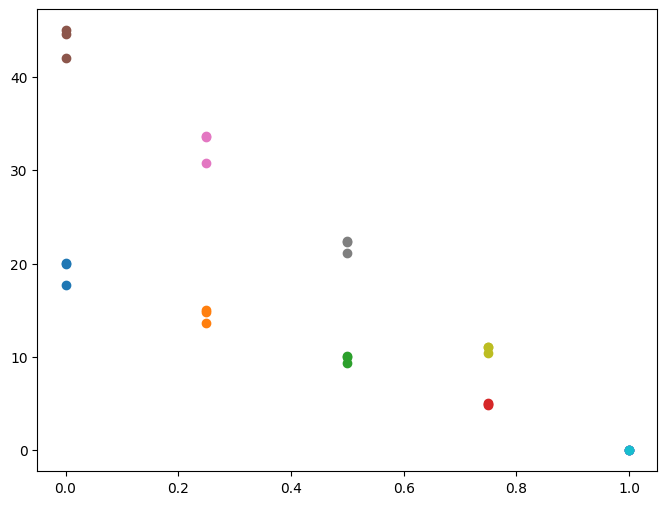

In [9]:
plt.figure(figsize=(8,6))

for row in df_sorted.iter_rows(named=True):
    x = row["lmbda"]
    y = row["v_mean"]
    # print("*")
    plt.scatter(x,y)
    
plt.show()

# .